# równanie nieliniowe pierwszego rzedu


zad 1 i 2


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
def model(y, t):
    dydt = t**2
    return dydt

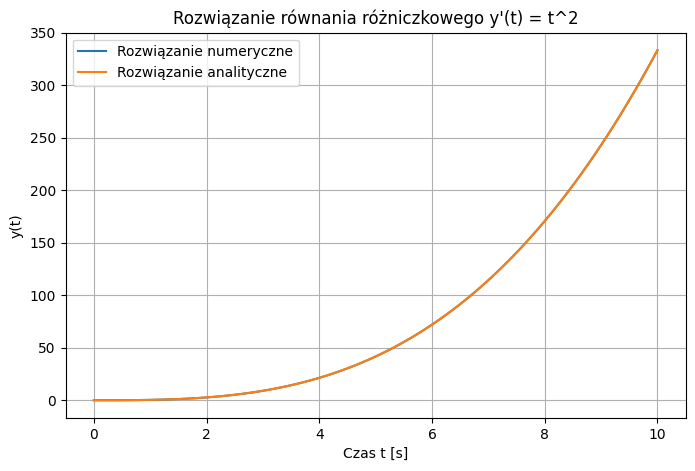

In [ ]:
t = np.linspace(0, 10, 100) 
y0 = 0
y = odeint(model, y0, t)

y_analityczne = 1/3 * t**3

plt.figure(figsize=(8, 5))
plt.plot(t, y, label='Rozwiązanie numeryczne')
plt.plot(t, y_analityczne, label='Rozwiązanie analityczne')
plt.xlabel('Czas t [s]')
plt.ylabel('y(t)')
plt.title('Rozwiązanie równania różniczkowego y\'(t) = t^2')
plt.grid(True)
plt.legend()
plt.show()

# równanie nieliniowe drugiego rzędu


In [15]:
def model_drugi(x, t):
    kp = 2
    w = 4
    C = 0.25
    u = 1.0

    y = x[0]
    dydt = x[1]
    
    dy2dt2 = -2*C*dydt/w - np.sqrt(y)/w + kp*u/w**2
    return [dydt, dy2dt2]


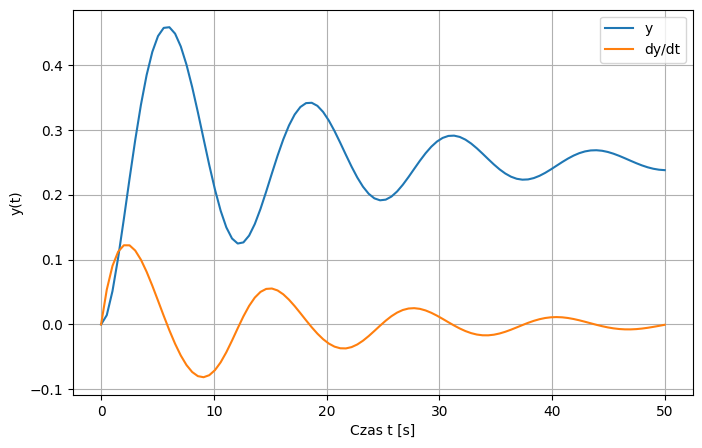

In [18]:
t = np.linspace(0, 50, 100) 
y0 = np.array([0, 0])

sol = odeint(model_drugi, y0, t)

y = sol[:, 0]
dydt = sol[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(t, y, label='y')
plt.plot(t, dydt, label='dy/dt')
# plt.plot(t, y_analityczne, label='Rozwiązanie analityczne')
plt.xlabel('Czas t [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

# układ z ograniczeniami


In [30]:
def feedback_limit(y, t, xd):
    kp = 2
    T = 2
    kob = 4

    u = np.clip(kp * (xd - y), -0.1, 0.1)

    dydt = (kob * u - y) / T
    return dydt

def feedback_nolimit(y, t, xd):
    kp = 2
    T = 2
    kob = 4

    u = kp * (xd - y)

    dydt = (kob * u - y) / T
    return dydt

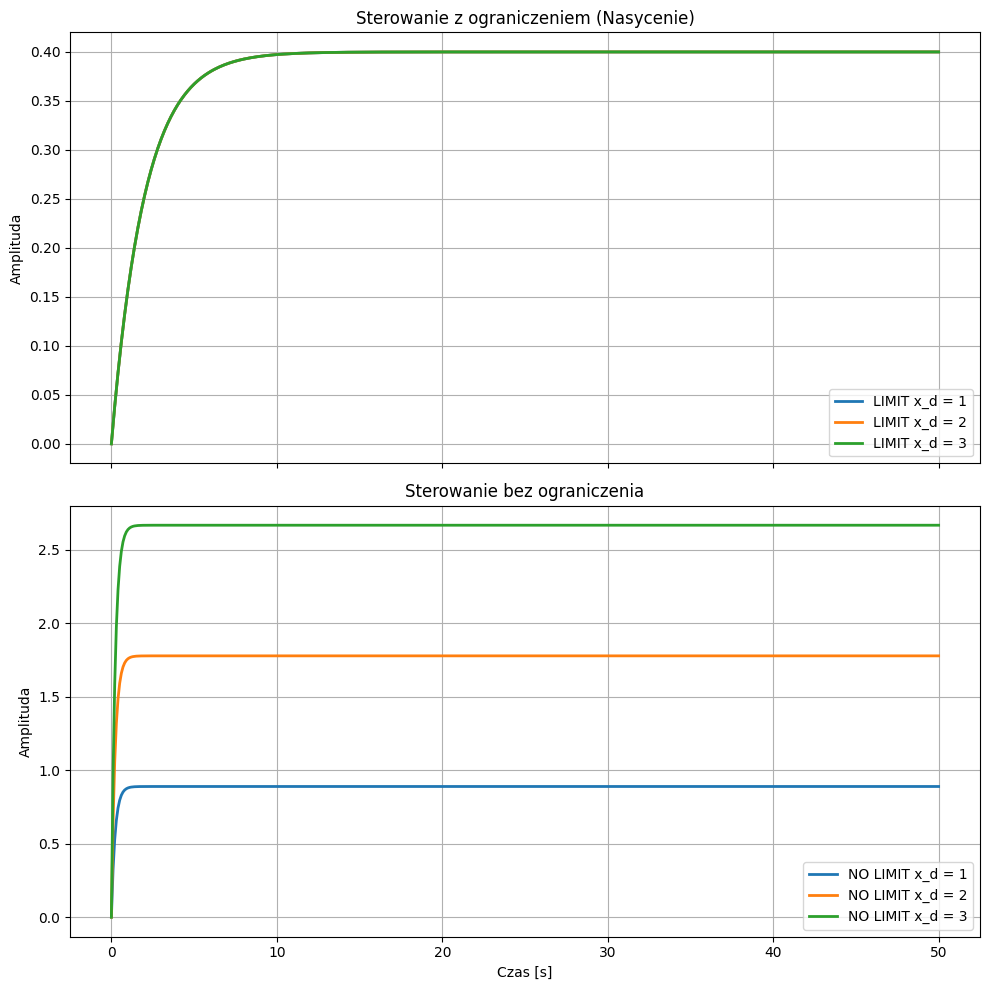

In [32]:
t = np.linspace(0, 50, 500)
y0 = 0

y1 = odeint(feedback_limit, y0, t, args=(1,))
y2 = odeint(feedback_limit, y0, t, args=(2,))
y3 = odeint(feedback_limit, y0, t, args=(3,))

y4 = odeint(feedback_nolimit, y0, t, args=(1,))
y5 = odeint(feedback_nolimit, y0, t, args=(2,))
y6 = odeint(feedback_nolimit, y0, t, args=(3,))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.plot(t, y1, label='LIMIT x_d = 1', linewidth=2)
ax1.plot(t, y2, label='LIMIT x_d = 2', linewidth=2)
ax1.plot(t, y3, label='LIMIT x_d = 3', linewidth=2)
ax1.set_ylabel('Amplituda')
ax1.set_title('Sterowanie z ograniczeniem (Nasycenie)')
ax1.grid(True)
ax1.legend()

ax2.plot(t, y4, label='NO LIMIT x_d = 1', linewidth=2)
ax2.plot(t, y5, label='NO LIMIT x_d = 2', linewidth=2)
ax2.plot(t, y6, label='NO LIMIT x_d = 3', linewidth=2)
ax2.set_xlabel('Czas [s]')
ax2.set_ylabel('Amplituda')
ax2.set_title('Sterowanie bez ograniczenia')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# napędzane wahadło


In [38]:
def model_wahadlo(theta, t):
    A = 1.5
    w = 0.65
    m = 0.5
    R = 1
    d = 0.5
    g = 10
    tau = A*np.cos(w*t)

    J = m*R**2

    y = theta[0]
    dydt = theta[1]
    
    dy2dt2 = tau/J - d*dydt/J - m*g*R*np.sin(y)/J
    
    return [dydt, dy2dt2]

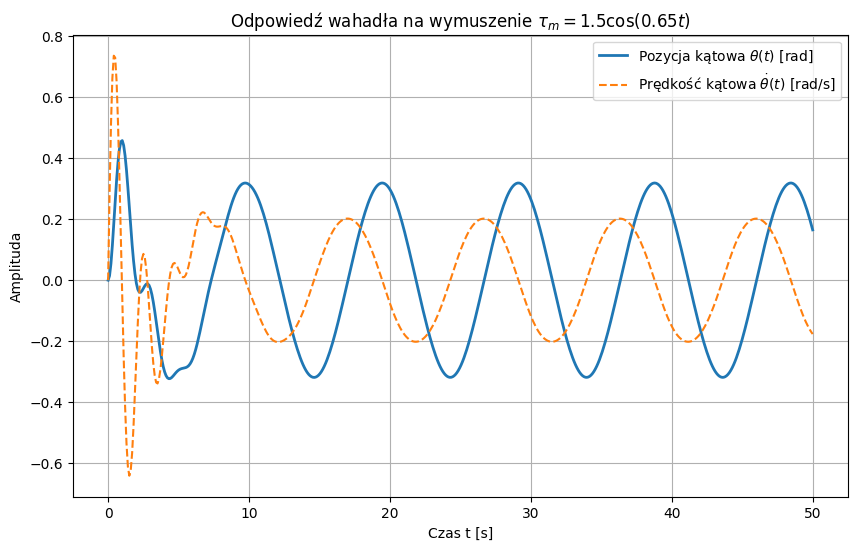

In [ ]:
t = np.linspace(0, 50, 500) 

y0 = [0, 0]

sol = odeint(model_wahadlo, y0, t)

y = sol[:, 0]
dydt = sol[:, 1] 

plt.figure(figsize=(10, 6))
plt.plot(t, y, label=r'Pozycja kątowa $\theta(t)$ [rad]', linewidth=2)
plt.plot(t, dydt, label=r'Prędkość kątowa $\dot{\theta}(t)$ [rad/s]', linestyle='--')
plt.title(r'Odpowiedź wahadła na wymuszenie $\tau_m = 1.5\cos(0.65t)$')
plt.xlabel('Czas t [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()